In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train_data=pd.read_csv('Titanic_train.csv')
test_data=pd.read_csv('Titanic_test.csv')

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
# Check for missing values in training data
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Summary statistics for numerical features
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


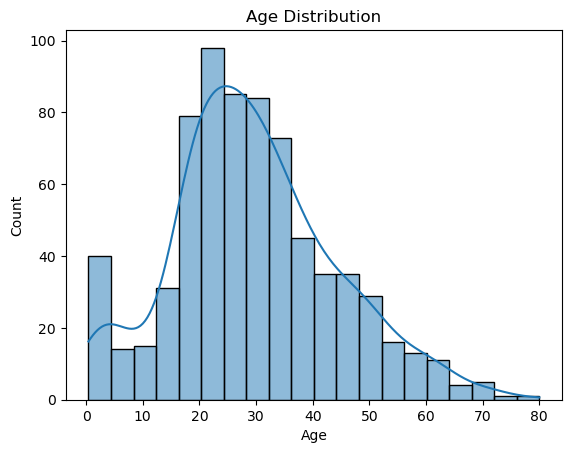

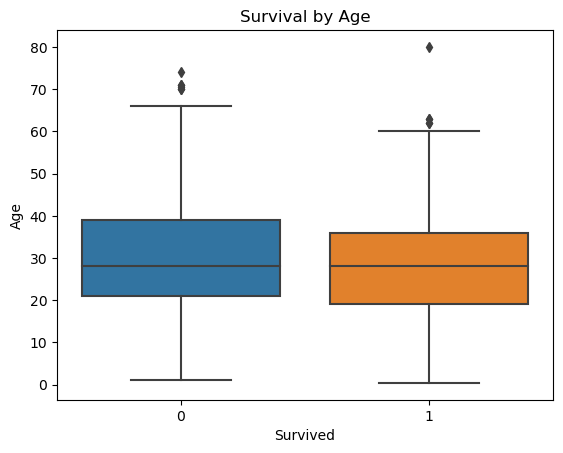

In [14]:
# Explore data distributions using histograms and box plots
sns.histplot(train_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Survival by Age')
plt.show()


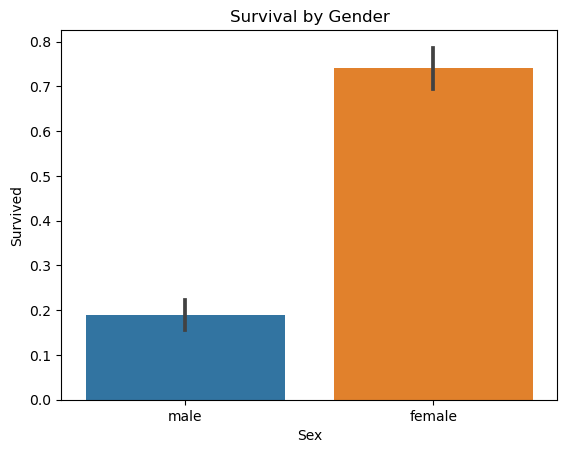

In [15]:
# Visualize relationships between features and survival
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival by Gender')
plt.show()

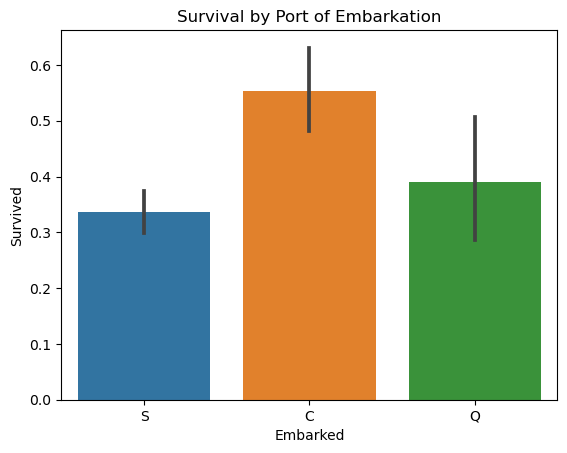

In [16]:
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival by Port of Embarkation')
plt.show()

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
# Combine train and test data for preprocessing
combined_data = pd.concat([train_data.drop('Survived', axis=1), test_data], axis=0)

# Impute missing values
num_features = ['Age', 'Fare']
cat_features = ['Embarked', 'Sex', 'Pclass']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Apply preprocessing to combined data
preprocessed_data = preprocessor.fit_transform(combined_data)

# Split preprocessed data back into train and test sets
X_train = preprocessed_data[:len(train_data)]
X_test = preprocessed_data[len(train_data):]

# Target variable
y_train = train_data['Survived']

In [19]:
#Building Predictive Models:

In [22]:
!pip install lightgbm
!pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.4/99.8 MB 11.6 MB/s eta 0:00:09
                                              1.0/99.8 MB 12.2 MB/s eta 0:00:09
                                              2.4/99.8 MB 17.1 MB/s eta 0:00:06
     -                                        4.6/99.8 MB 24.7 MB/s eta 0:00:04
     --                                       5.5/99.8 MB 27.2 MB/s eta 0:00:04
     ---                                      7.7/99.8 MB 29.1 MB/s eta 0:00:04
     ---                                     10.1/99.8 MB 32.3 MB/s eta 0:00:03
     ----                                    11.6/99.8 MB 38.6 MB/s eta 0:00:03
     ----                                    12.5/99.8 MB 36.4 MB/s eta 0:00:03
     -----                                   13.3/99.8 MB 34.4 MB/s eta 0:00:03
     -----                                   14.3/99.8 MB 31.2 MB/s eta 0:00:03
     -----                                   15.

In [24]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Define evaluation metric
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean()

# Instantiate models
lgbm_model = LGBMClassifier()
xgb_model = XGBClassifier()

# Evaluate models
lgbm_accuracy = evaluate_model(lgbm_model, X_train, y_train)
xgb_accuracy = evaluate_model(xgb_model, X_train, y_train)

print("LightGBM Accuracy:", lgbm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LightGBM Accuracy: 0.8226916075575922
XGBoost Accuracy: 0.8170736300295023


In [ ]:
#LightGBM Accuracy: 0.8226916075575922
#XGBoost Accuracy: 0.8170736300295023